# 8.回归

In [5]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

## 8.1.读取数据

In [2]:
def loadDataSet(fileName): 
    """
    读取数据
    参数：
        fileName -- 文件名
    返回：
        dataMat -- 数据矩阵
        labelMat -- 标签矩阵
    """
    # 特征数
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        # 以制表符分割
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [3]:
def standRegres(xArr,yArr):
    """
    标准回归函数
    参数：
        xArr -- x参数
        yArr -- y参数
    """
    # 转换为矩阵
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    # 如果行列式为0，则为奇异矩阵
    if linalg.det(xTx) == 0.0:
        print("奇异矩阵，没法求逆")
        return
    # 公式法计算
    ws = xTx.I * (xMat.T*yMat)
    return ws

测试

In [4]:
xArr,yArr = loadDataSet("ex0.txt")
ws = standRegres(xArr,yArr)
print(f"结果ws = {ws}")

结果ws = [[3.00774324]
 [1.69532264]]


预测并绘图

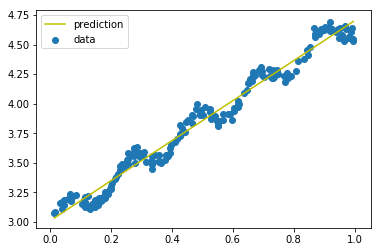

In [9]:
# 预测
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

# 绘图
# 数据散点图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
# 预测回归直线
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat, color='y')
ax.legend(("prediction", "data"))

计算相关性

In [10]:
corrcoef(yHat.T, yMat)

array([[1.        , 0.13653777],
       [0.13653777, 1.        ]])

相关性并不高，线性模型有待改进

## 8.2.局部线性回归（Local Weight Linear Regression）（LWLR）

In [11]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    """
    局部线性回归函数
    参数：
        testPoint -- 测试点
        xArr -- x参数
        yArr -- y参数
        k -- 核参数
    """
    # 处理数据
    xMat = mat(xArr); yMat = mat(yArr).T
    # 样本个数
    m = shape(xMat)[0]
    # 初始化权重
    weights = mat(eye((m)))
    # 对于每个样本
    for j in range(m):
        # 求差
        diffMat = testPoint - xMat[j,:]
        # 高斯核计算权重
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    # 加权的xTx
    xTx = xMat.T * (weights * xMat)
    # 判断奇异性
    if linalg.det(xTx) == 0.0:
        print("奇异矩阵，求不了逆")
        return
    # 公式计算出预测结果
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [12]:
def lwlrTest(testArr,xArr,yArr,k=1.0):
    """
    对每个点计算局部权重
    参数：
        testArr -- 测试矩阵
        xArr -- x参数
        yArr -- y参数
        k -- 核参数
    """
    # 样本点个数
    m = shape(testArr)[0]
    # 初始化预测结果
    yHat = zeros(m)
    # 对每个点计算局部权重，得到预测值
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

测试

In [20]:
yHats = []
for k in [1.0, 0.01, 0.003]:
    yHat = lwlrTest(xArr,xArr,yArr,k)
    yHats.append(yHat)

绘图

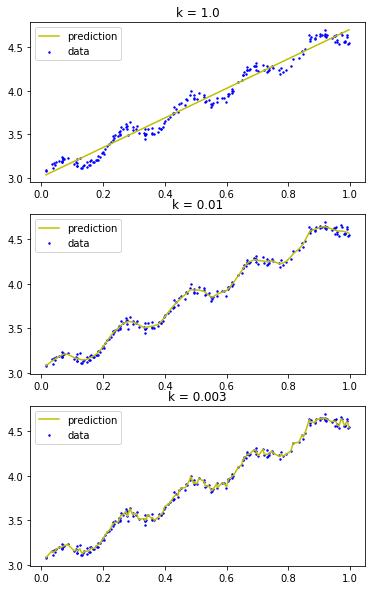

In [29]:
# 对数据点排序
xMat = mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]

# 绘图
fig = plt.figure(num=None, figsize=(6, 10))
for i, k in enumerate([1.0, 0.01, 0.003]):
    ax = fig.add_subplot(3, 1, i+1)
    ax.plot(xSort[:, 1], yHats[i][srtInd], c='y')
    ax.scatter(xMat[:, 1].flatten().A[0], mat(yArr).T.flatten().A[0], s=2, c='b')
    ax.legend(("prediction", "data"))
    plt.title(f"k = {k}")

## 8.3.实例：预测鲍鱼的年龄

In [30]:
def rssError(yArr,yHatArr):
    """
    计算回归误差
    参数：
        yArr -- y数据
        yHatArr -- y预测
    返回：
        L2loss
    """
    return ((yArr-yHatArr)**2).sum()

### 8.3.1.读取数据

In [31]:
abX, abY = loadDataSet("abalone.txt")

### 8.3.2.预测，并计算误差

In [32]:
# 得到预测值
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

# 计算预测误差
error01 = rssError(abY[0:99], yHat01.T)
error1 = rssError(abY[0:99], yHat1.T)
error10 = rssError(abY[0:99], yHat10.T)

# 打印结果
print(f"error01 = {error01}\nerror1 = {error1}\nerror10 = {error10}")

error01 = 56.78420911837208
error1 = 429.89056187030394
error10 = 549.1181708826065


k = 0.1的结果最好，但是不是一成不变的

看看它们在新数据集上的表现

In [33]:
# 得到预测值
yHat01 = lwlrTest(abX[100:199], abX[100:199], abY[100:199], 0.1)
yHat1 = lwlrTest(abX[100:199], abX[100:199], abY[100:199], 1)
yHat10 = lwlrTest(abX[100:199], abX[100:199], abY[100:199], 10)

# 计算预测误差
error01 = rssError(abY[0:99], yHat01.T)
error1 = rssError(abY[0:99], yHat1.T)
error10 = rssError(abY[0:99], yHat10.T)

# 打印结果
print(f"error01 = {error01}\nerror1 = {error1}\nerror10 = {error10}")

error01 = 3580.5304330698336
error1 = 2568.743170627686
error10 = 2648.9694571854866


## 8.4.岭回归

In [34]:
def ridgeRegres(xMat,yMat,lam=0.2):
    """
    岭回归算法
    参数：
        xMat -- x数据
        yMat -- y数据
        lam -- 岭回归参数
    返回：
        ws -- 预测值
    """
    xTx = xMat.T*xMat
    # 加上“岭”
    denom = xTx + eye(shape(xMat)[1])*lam
    # 判断奇异性，避免lambda为0引发错误
    if linalg.det(denom) == 0.0:
        print("奇异矩阵，没法求逆")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [35]:
def ridgeTest(xArr,yArr):
    """
    岭回归
    参数：
        xArr -- x数据
        yArr -- y数据
    返回：
        wMat -- 预测
    """
    xMat = mat(xArr); yMat=mat(yArr).T
    yMean = mean(yMat,0)
    # 去均值化
    yMat = yMat - yMean
    # 标准化x
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)
    xMat = (xMat - xMeans)/xVar
    # 预测点数
    numTestPts = 30
    # 初始化预测结果矩阵
    wMat = zeros((numTestPts,shape(xMat)[1]))
    # 逐一预测
    for i in range(numTestPts):
        # lambda的值指数变化
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:]=ws.T
    return wMat

测试

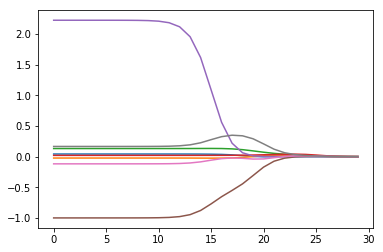

In [36]:
# 得到30个点的预测结果
ridgeweights = ridgeTest(abX,abY)

# 绘图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeweights)

## 8.5.前向逐步回归

In [39]:
def regularize(xMat):
    """
    按行标准化
    参数：
        xMat -- x数据矩阵
    返回：
        inMat -- 标准化结果
    """
    inMat = xMat.copy()
    inMeans = mean(inMat,0)
    inVar = var(inMat,0)
    inMat = (inMat - inMeans)/inVar
    return inMat

In [41]:
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    """
    逐步前向回归
    参数：
        xArr -- x数据
        yArr -- y数据
        eps -- 每次迭代需要调整的步长
        numIt -- 迭代次数
    返回：
        returnMat -- 返回矩阵
    """
    xMat = mat(xArr); yMat=mat(yArr).T
    # 去均值
    yMean = mean(yMat,0)
    yMat = yMat - yMean
    # 正则化
    xMat = regularize(xMat)
    # x矩阵的维度
    m,n=shape(xMat)
    # 初始化返回矩阵
    returnMat = zeros((numIt,n))
    ws = zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
        #print(ws.T)
        lowestError = inf; 
        for j in range(n):
            for sign in [-1,1]:
                # 调整步长
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A,yTest.A)
                # 贪婪算法
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

测试

In [42]:
stageWise(abX, abY, 0.01, 200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

用更小的步长测试

In [44]:
stageWise(abX, abY, 0.001, 5000)

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])